In [2]:
#A program that takes a look at stock market over the last 10 years and predicts future rates as well as predicts how much you'd have earned if you had bought the S&P now in any part of the last 10 years

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import requests

In [3]:
stock_prices= pd.read_csv('C:\\Users\\sonam\\Downloads\\HistoricalData_1726504985107.csv', index_col= 'Date', parse_dates= True, na_values= '0')

In [4]:
stock_prices.head()

,Close/Last,Open,High,Low
Date,,,,
2024-09-13,5626.02,5603.34,5636.27,5601.65
2024-09-12,5595.76,5557.48,5600.71,5535.50
2024-09-11,5554.13,5496.42,5560.41,5406.96
2024-09-10,5495.52,5490.51,5497.91,5441.72
2024-09-09,5471.05,5442.07,5484.20,5434.49


In [5]:
#Creating each 
closing = stock_prices[['Close/Last']]
date= stock_prices.index
high = stock_prices[['High']]
low = stock_prices[['Low']]
closing

,Close/Last
Date,
2024-09-13,5626.02
2024-09-12,5595.76
2024-09-11,5554.13
2024-09-10,5495.52
2024-09-09,5471.05
...,...
2014-09-22,1994.29
2014-09-19,2010.40
2014-09-18,2011.36


In [6]:
stock_prices['Open']= stock_prices['Open'].ffill()
need_closing = stock_prices['Open'].sort_index().loc['12/31/2014':'12/31/2016']

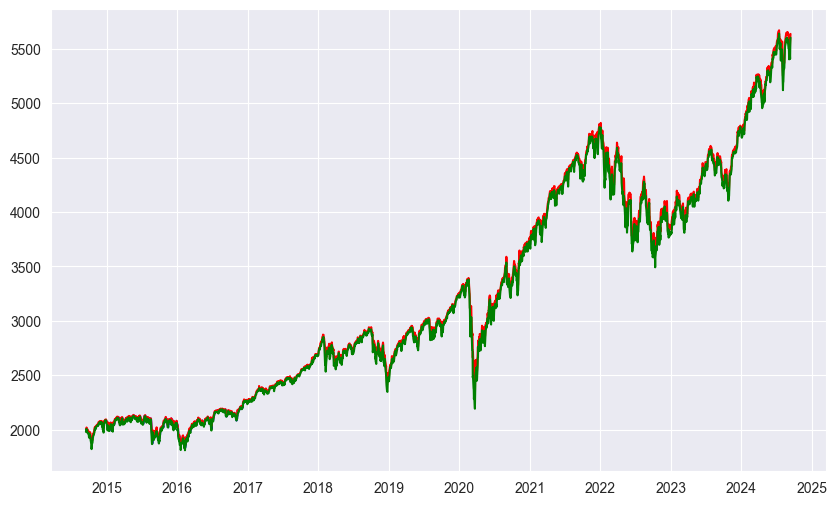

In [7]:
plt.figure(figsize= (10, 6))
plt.plot(need_closing, color = "blue")
plt.plot(high, color = "red")
plt.plot(low, color = "green")


## Checking all the abnormal change in the market and looking at their reason:

In [8]:
pct_change = closing.pct_change(-1).dropna()
#Computes the percentage change between two values and dropna is required to remove values that may not have previous value to create a percentage change from i.e first and last data. (-1) for the pct_change to be in descending order

In [9]:
normalized_data = (pct_change - pct_change.mean()) / pct_change.std()
abnormal_dips_score = pct_change.min(axis=1)

In [10]:
threshold = abnormal_dips_score.mean() - 3.5 * abnormal_dips_score.std()
#Defining threshold to classify what values are abnormal

In [11]:
#Creating DataFrame containing the dates and abnormal values
abnormal_dips = abnormal_dips_score[abnormal_dips_score < threshold].abs()
abnormal_dips= pd.DataFrame(abnormal_dips, columns=['a'])

In [12]:
#Creating variables for easier plotting
abnormal_dates = abnormal_dips.index
abnormal_values = abnormal_dips['a']

In [13]:
#Loking at the dates with the highest dips in 10 years
stacked_data= closing.loc[abnormal_dates]
print(stacked_data)

            Close/Last
Date                  
2022-09-13     3932.69
2022-05-18     3923.68
2020-06-11     3002.10
2020-04-01     2470.50
2020-03-20     2304.92
2020-03-18     2398.10
2020-03-16     2386.13
2020-03-12     2480.64
2020-03-11     2741.38
2020-03-09     2746.56
2020-02-27     2978.76
2018-02-05     2648.94
2015-08-24     1893.21


## Plotting the Stock Prices marked by every Abnormal Dips

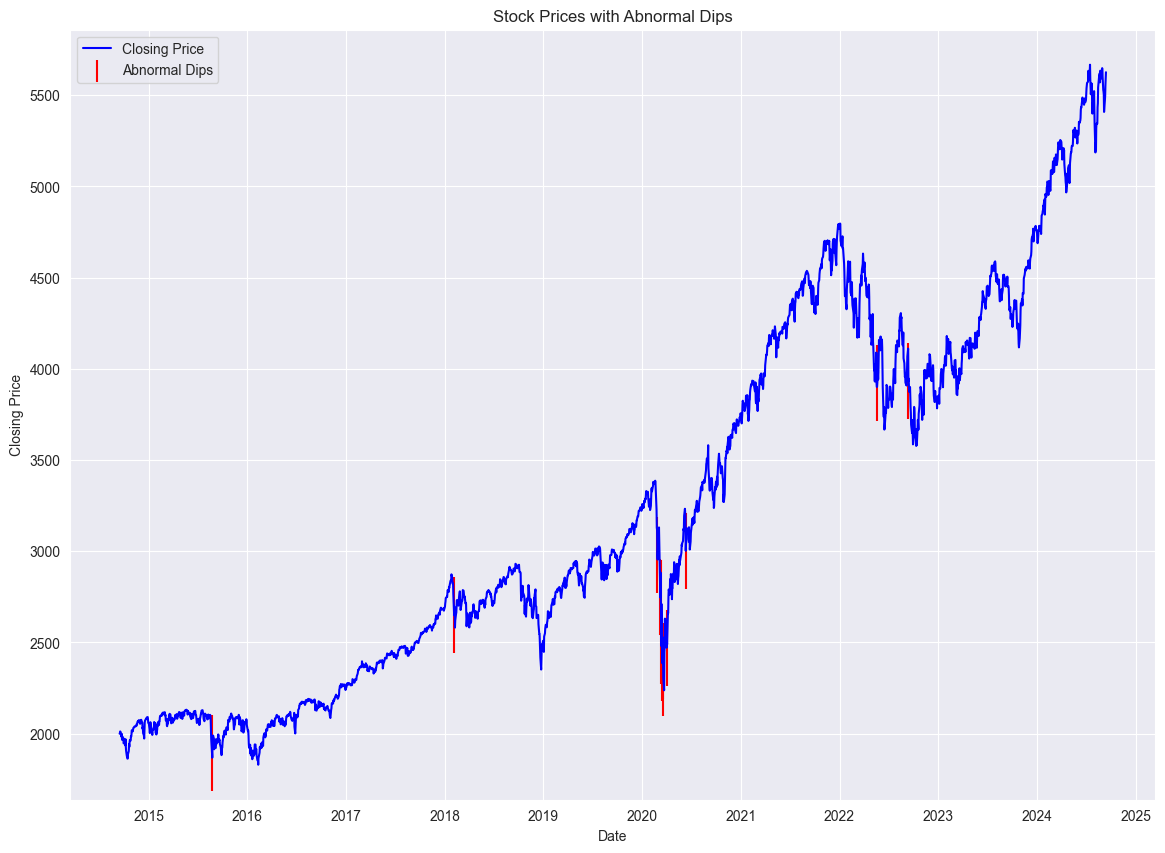

In [14]:
#Plotting the original data with the dips marked
plt.figure(figsize=(14, 10))
plt.plot(closing.index, closing.values, label='Closing Price', color='blue')
plt.scatter(stacked_data.index,stacked_data.values, color='red', marker='|', label= 'Abnormal Dips', s=3000)
plt.legend(scatterpoints=1, markerscale=0.3)

# Adding labels and title
plt.title('Stock Prices with Abnormal Dips')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()


## Taking every abnormal dips and studying it

### August 24th 2015

In [58]:
sorted_stock = stock_prices.sort_index()
start_date = '2015-08-10'
end_date = '2015-08-30'
# Extract rows within the date range
first_dip = sorted_stock.loc[start_date:end_date]

### February 5th 2018

In [16]:
start_date = '2018-01-25'
end_date = '2018-02-25'
# Extract rows within the date range
second_dip = sorted_stock.loc[start_date:end_date]

### February - June 2020

In [17]:
start_date = '2020-02-25'
end_date = '2020-06-25'
#Extract rows within the date range
third_dip = sorted_stock.loc[start_date:end_date]

### May 18th 2022

In [18]:
start_date = '2022-05-10'
end_date = '2022-05-30'
#Extract rows within the date range
fourth_dip = sorted_stock.loc[start_date:end_date]

### September 13th 2022

In [60]:
start_date = '2022-09-01'
end_date = '2022-10-01'
#Extract rows within the date range
fifth_dip = sorted_stock.loc[start_date:end_date]

In [91]:
dips = [
    {"data": first_dip, "row": 3, "col": 1, "title": 'August 24th 2015'},
    {"data": second_dip, "row": 3, "col": 2, "title": 'February 5th 2018'},
    {"data": third_dip, "row": 2, "col": 1, "title": 'Feb - June 2020'},
    {"data": fourth_dip, "row": 2, "col": 2, "title": 'May 18th 2022'},
    {"data": fifth_dip, "row": 1, "col": 1, "title": 'September 13th 2022'}
] #Created a Dictionary to make the coding smaller
# Create the subplot figure
fig = make_subplots(rows=3, cols=2, start_cell="bottom-left")
fig.update_layout(height=600, width=800, title_text='Abnormal Dips throughout Five-Year margin', showlegend=False, 
                  margin=dict(l=20, r=20, t=40, b=60), paper_bgcolor="Black")
fig.update_xaxes(rangeslider_visible=False)

# Loop through each dip data and add the traces
for dip in dips:
    fig.add_trace(go.Candlestick(x=dip['data'].index,
                                 open=dip['data']['Open'],
                                 high=dip['data']['High'],
                                 low=dip['data']['Low'], close=dip['data']['Close/Last']), row=dip['row'], col=dip['col'])
# Show the figure
fig.show()


In [96]:
# BASE_URL = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey=HQW7799XH2IF0VB3'
# r = requests.get(url)
# 
# # Define the parameters
# params = {
#     'function': 'TIME_SERIES_INTRADAY',
#     'symbol': 'AAPL',  # Apple stock symbol
#     'interval': '60min',  # Interval options: 1min, 5min, 15min, 30min, 60min
#     'adjusted': 'true',
#     'extended_hours': 'true',
#     'month': '2015-08',  # Month for August 2015
#     'datatype': 'json',
#     'apikey': 'HQW7799XH2IF0VB3'
# }
# 
# # Make the API request for August 2015 data
# response_aug = requests.get(BASE_URL, params=params)
# 
# # Convert the response JSON to a dictionary
# data_aug = response_aug.json()
# 
# # Extract the time series data
# time_series_aug = data_aug.get('Time Series (60min)', {})
# 
# 
# # Create a DataFrame from the combined data
# df = pd.DataFrame.from_dict(time_series_aug, orient='index')
# 
# # Convert index to datetime
# df.index = pd.to_datetime(df.index)
# 
# # Filter data between the specified date range
# 
# # Rename columns for readability
# df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
# 
# # Convert columns to appropriate data types
# df_filtered = df.apply(pd.to_numeric)
# 
# # Display the filtered DataFrame
# df_filtered


                        Open     High      Low    Close    Volume
2015-08-31 19:00:00  25.4009  25.4054  25.3400  25.3400    111324
2015-08-31 18:00:00  25.4348  25.4393  25.3987  25.4054     62664
2015-08-31 17:00:00  25.4303  25.4528  25.4235  25.4416     93948
2015-08-31 16:00:00  25.4551  25.4732  25.4106  25.4167  16033804
2015-08-31 15:00:00  25.3944  25.5804  25.3896  25.4438  37859220
...                      ...      ...      ...      ...       ...
2015-08-24 04:00:00  23.8026  23.8026  22.8003  22.8726    631100
2015-08-24 01:00:00  22.8680  22.8680  22.8680  22.8680       504
2015-08-21 19:00:00  23.9381  23.9449  23.8726  23.9065    326776
2015-08-21 18:00:00  23.9426  23.9742  23.9245  23.9403    253376
2015-08-21 17:00:00  23.9855  24.0306  23.8749  23.9510   3332596

[100 rows x 5 columns]
